In [78]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter


In [ ]:
# !!! Directory containing your CSV files, Please change this to your actual directory !!!
directory = r'D:\Masterarbeit\Data\Kullanacagim_Data\Preprocessed_Files\equal_columns\for_memory_filled2'

# Dictionary to store the DataFrames
dataframes = {}

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        key = filename[:-4]
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Convert date column with explicit format DD/MM/YYYY
        df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')
        df = df.dropna(subset=['date'])  # Remove rows with invalid dates
        df = df.sort_values('date')  # Ensure chronological order
        
        dataframes[key] = df

In [ ]:
selected_countries = {
    'Germany': dataframes['Germany'], 
    'Sweden': dataframes['Sweden'],
    'Spain': dataframes['Spain']
}

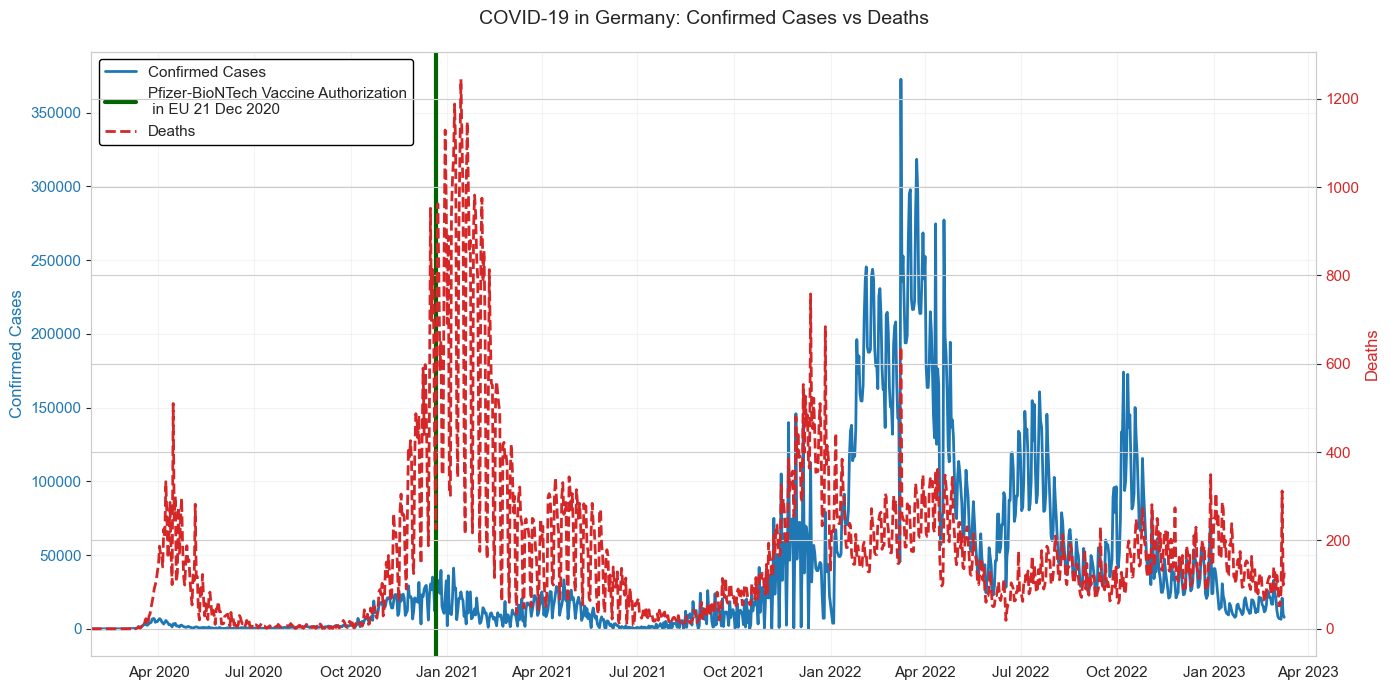

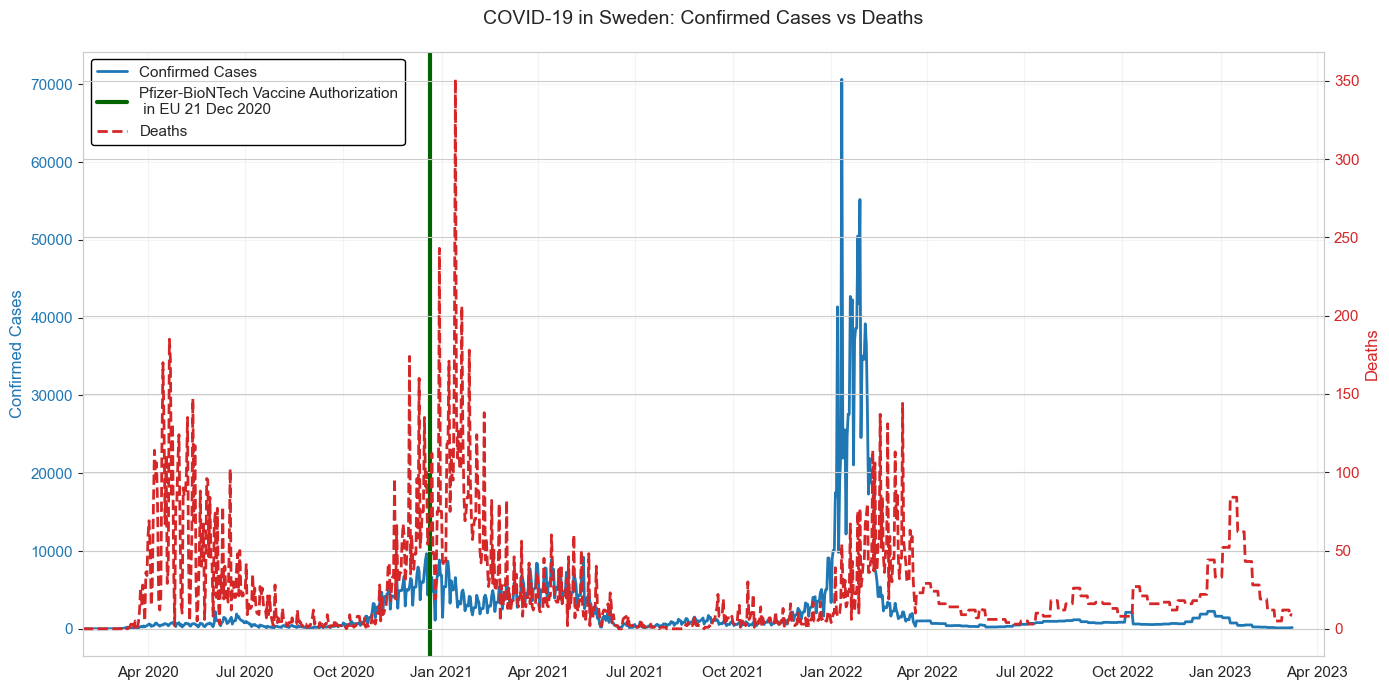

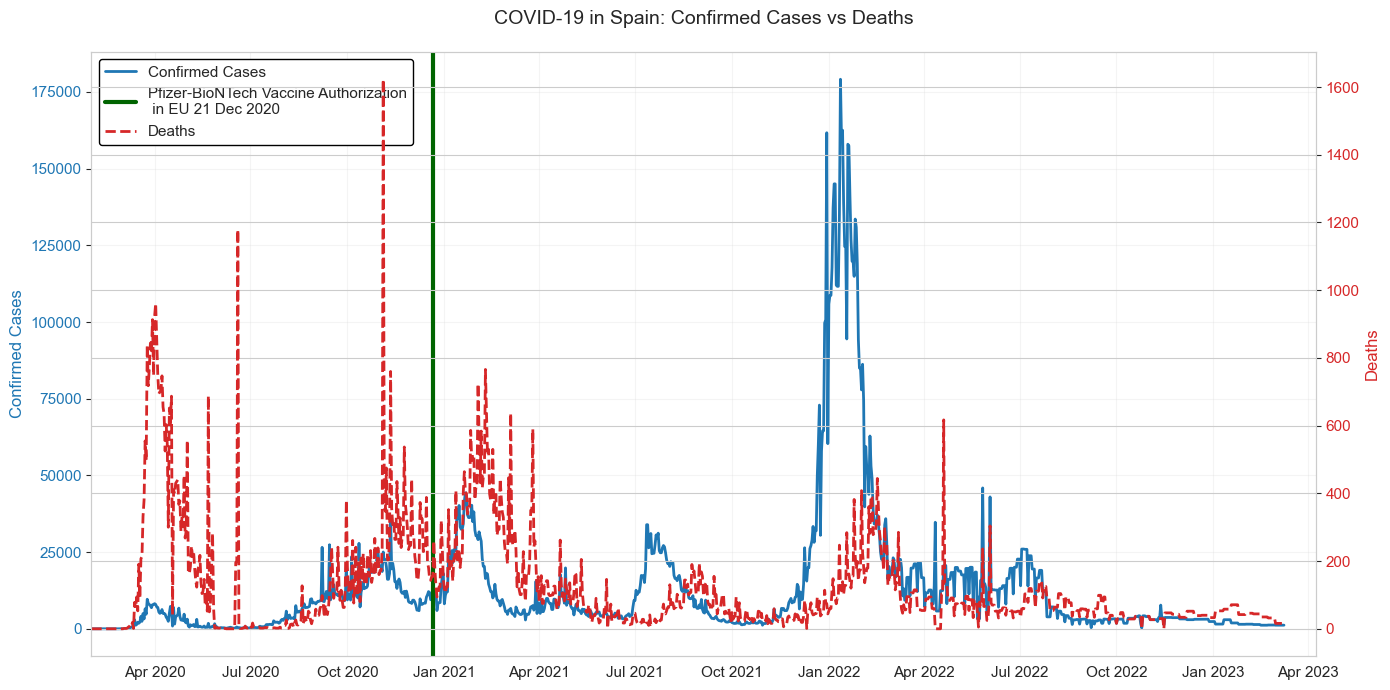

In [ ]:
# Vaccine authorization date
vaccine_date = pd.to_datetime('2020-12-21')

# Create separate plots for each country
for country, df in selected_countries.items():
    fig, ax1 = plt.subplots(figsize=(14, 7))  # Slightly taller figure
    
    # Plot confirmed cases on primary axis (left)
    color = 'tab:blue'
    ax1.set_ylabel('Confirmed Cases', color=color, fontsize=12)
    ax1.plot(df['date'], df['confirmed'], color=color, label=f'Confirmed Cases', linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=11)
    ax1.grid(True, alpha=0.2)  # Lighter grid
    
    # Create secondary axis for deaths (right)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Deaths', color=color, fontsize=12)
    ax2.plot(df['date'], df['deaths'], color=color, linestyle='--', label='Deaths', linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=11)
    
    # Configure date formatting - quarterly months and years
    ax1.xaxis.set_major_locator(MonthLocator(bymonth=(1,4,7,10)))  # Quarterly months
    ax1.xaxis.set_major_formatter(DateFormatter('%b %Y'))  # Format as "Jan 2020"
    ax1.tick_params(axis='x', labelsize=11)
    
    # Add prominent vaccine authorization line
    ax1.axvline(x=vaccine_date, color='darkgreen', linestyle='-', linewidth=3,
               label='Pfizer-BioNTech Vaccine Authorization\n in EU 21 Dec 2020', zorder=5)
    
    # Add space at the end (30 days padding)
    padding = pd.Timedelta(days=30)
    ax1.set_xlim(df['date'].min(), df['date'].max() + padding)
    
    # Title and legend
    plt.title(f'COVID-19 in {country}: Confirmed Cases vs Deaths', pad=20, fontsize=14)
    
    # Combine and enhance legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    legend = ax1.legend(lines1 + lines2, labels1 + labels2, 
                      loc='upper left',
                      framealpha=1,  # Solid background
                      edgecolor='black',
                      fontsize=11)
    legend.set_zorder(10)  # Make sure legend appears above everything
    
    # Adjust layout
    plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
    plt.tight_layout()

plt.show()

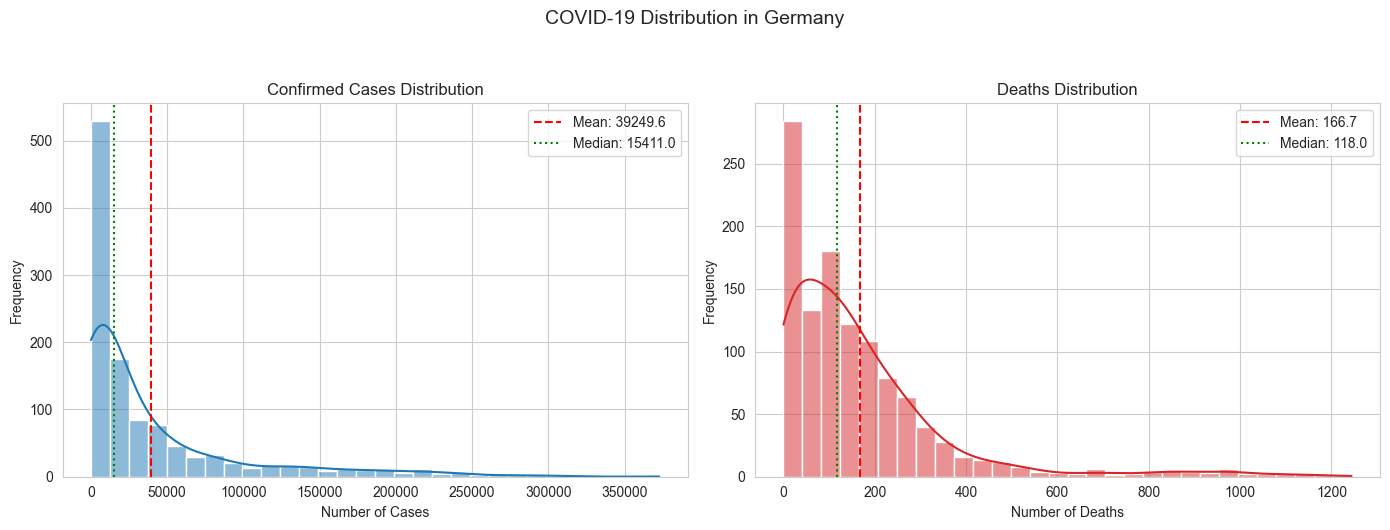

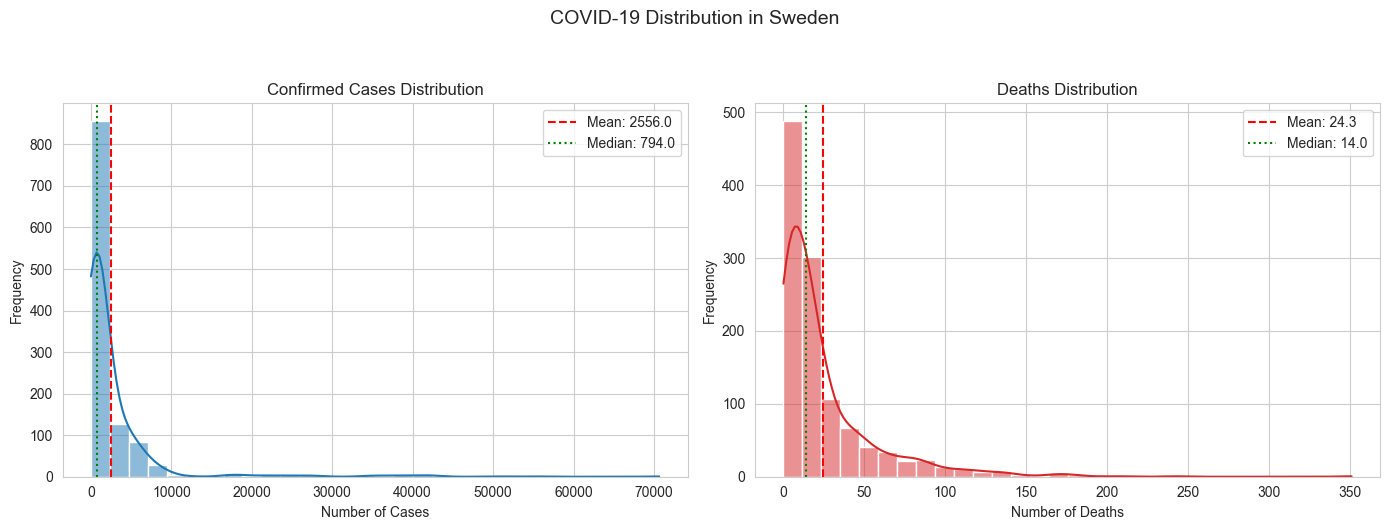

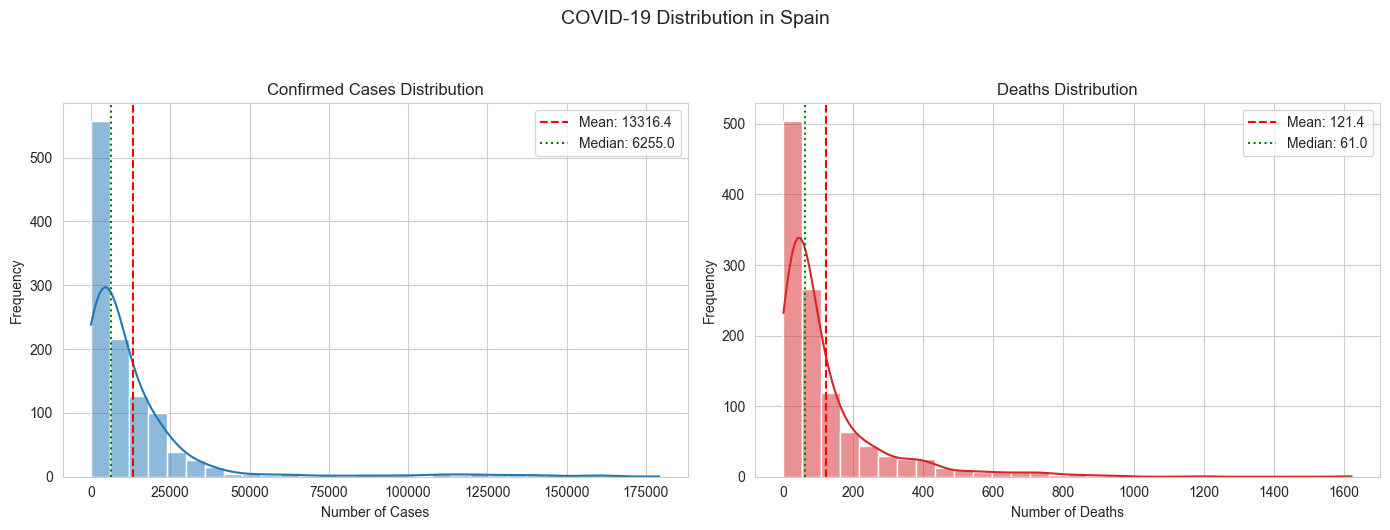

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
palette = {"Confirmed": "#1f77b4", "Deaths": "#d62728"}

# Loop through each country and create standalone plots
for country, df in selected_countries.items():
    # Create figure with 2 subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'COVID-19 Distribution in {country}', fontsize=14, y=1.05)
    
    # Confirmed Cases Plot
    sns.histplot(df['confirmed'], kde=True, ax=ax1, color=palette["Confirmed"], bins=30)
    ax1.set_title('Confirmed Cases Distribution')
    ax1.set_xlabel('Number of Cases')
    ax1.set_ylabel('Frequency')
    ax1.axvline(df['confirmed'].mean(), color='red', linestyle='--', label=f'Mean: {df["confirmed"].mean():.1f}')
    ax1.axvline(df['confirmed'].median(), color='green', linestyle=':', label=f'Median: {df["confirmed"].median():.1f}')
    ax1.legend()
    
    # Deaths Plot
    sns.histplot(df['deaths'], kde=True, ax=ax2, color=palette["Deaths"], bins=30)
    ax2.set_title('Deaths Distribution')
    ax2.set_xlabel('Number of Deaths')
    ax2.set_ylabel('Frequency')
    ax2.axvline(df['deaths'].mean(), color='red', linestyle='--', label=f'Mean: {df["deaths"].mean():.1f}')
    ax2.axvline(df['deaths'].median(), color='green', linestyle=':', label=f'Median: {df["deaths"].median():.1f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

In [46]:
# Check policy impact after 14 days (typical COVID-19 lag)
df['cases_7day_avg'] = df['confirmed'].rolling(7).mean()
for policy in ['closhigh', 'masksmandatoryallspaces']:
    print(f"14-day lag correlation for {policy}:",
          df[policy].shift(14).corr(df['cases_7day_avg']))

14-day lag correlation for closhigh: -0.19308061531106788
14-day lag correlation for masksmandatoryallspaces: 0.39755093428152055


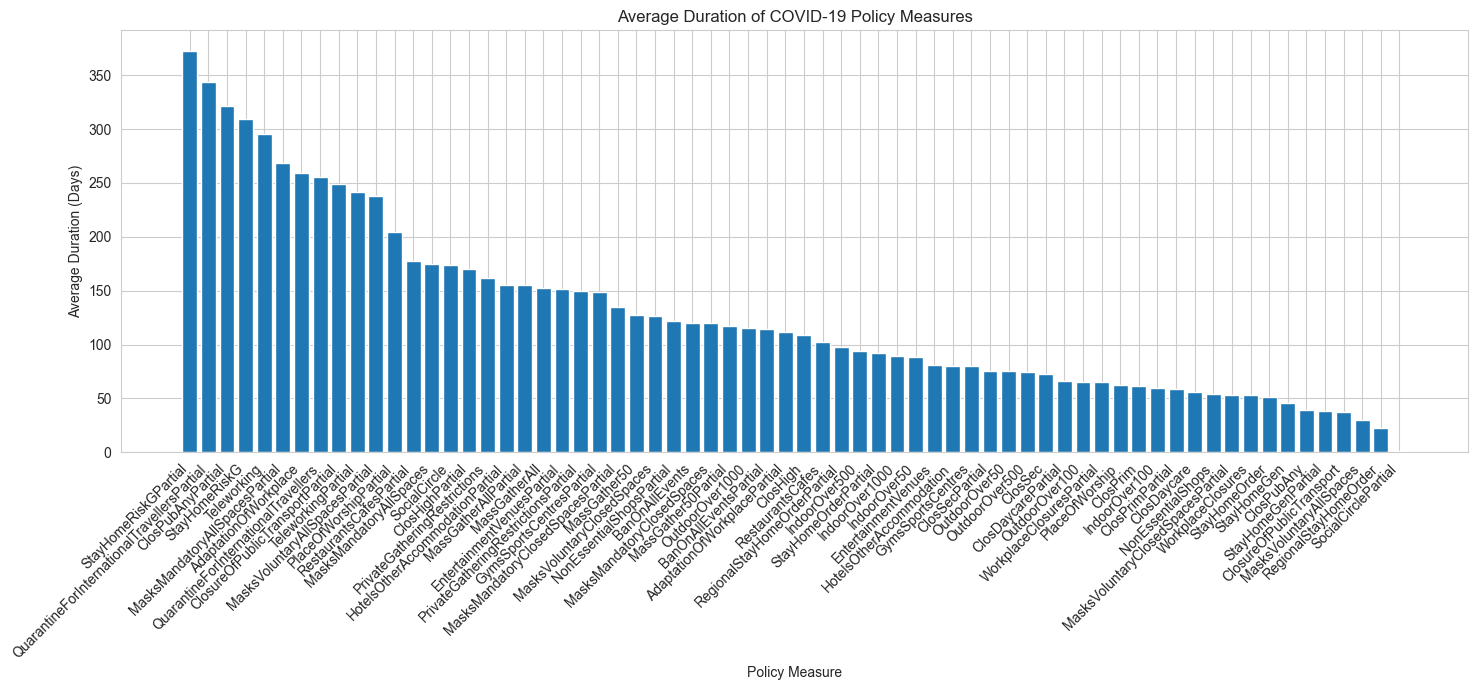

In [ ]:


# Load the data
df = pd.read_csv('D:/Masterarbeit/Data/Kullanacagim_Data/Covid_response_data/average_response_durations.csv')

# Sort by average duration descending
df_sorted = df.sort_values('Average_Duration_Days', ascending=False)

# Plot a bar chart
plt.figure()
plt.bar(df_sorted['Response_measure'], df_sorted['Average_Duration_Days'])
plt.xlabel('Policy Measure')
plt.ylabel('Average Duration (Days)')
plt.title('Average Duration of COVID-19 Policy Measures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()